# Exercise 9 -Path Planning

## 9.1 Greedy Uninformed Search [3.0]

In this exercise, you will implement a greedy uninformed search algorithm to find the shortest path from a start to a goal location.

The input to the search is:
- the map of the environment $\mathbf{M}$
- the start position $\mathbf{x}_{start}$
- the goal position $\mathbf{x}_{goal}$

The output is the sequence of positions $(x,y)$ from the start to the goal.

At each step, the robot is allowed to move from one cell to one of the 8 neighboring cells.

This search algorithm is similar to A* but does not use any heuristic to guide the search.
Therefore, the cost of each step of the search is defined only by $g(\mathbf{x})$, which is the 'actual' cost from $\mathbf{x}_{start}$ to $\mathbf{x}$. 

Implement the `plan_path_uninformed` function and verify that it is correct for some test input.

Use the available function `is_valid` to select only the cells that belong to the free space.

In [1]:
%matplotlib inline
import ex9 as ex
import matplotlib.image as mpimg
import numpy as np
import timeit

In [2]:
M_test = np.array([[1,1,0,1,1,1,1,1,1,1],
              [1,1,0,1,1,1,1,1,1,1],
              [1,1,0,1,1,1,1,1,1,1],
              [1,1,0,1,1,0,0,1,1,1],
              [1,1,1,1,1,0,0,1,1,1],
              [1,1,0,0,0,0,0,0,1,1],
              [1,1,1,1,0,0,1,1,1,1],
              [1,1,1,1,0,0,1,1,1,1],
              [1,1,1,1,0,0,1,1,1,1],
              [1,1,1,1,0,0,1,1,1,1]])
x_start = np.array([0,0])
x_goal = np.array([9,9])

path = ex.plan_path_uninformed(x_start,x_goal,M_test)

print_path = [[0 for i in range(10)]for j in range(10)]
print_path[0][0] = "*"
for i in range(path.shape[0]):
    print_path[path[i][0]][path[i][1]] = "*"
for j in range(len(print_path)):
    print(print_path[j])

At goal point
Number of nodes explored are:  78
Length of the path:  16
['*', 0, 0, 0, 0, 0, 0, 0, 0, 0]
['*', 0, 0, 0, 0, '*', 0, 0, 0, 0]
['*', 0, 0, 0, '*', 0, '*', 0, 0, 0]
[0, '*', 0, '*', 0, 0, 0, '*', 0, 0]
[0, 0, '*', 0, 0, 0, 0, '*', 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, '*', 0]
[0, 0, 0, 0, 0, 0, 0, '*', 0, 0]
[0, 0, 0, 0, 0, 0, 0, '*', 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, '*', 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, '*']


## 9.2 Greedy Uninformed Planning [2.0]

Use `plan_path_uninformed` to plan a path from start to goal in the following scenario.

Plot the resulting path with the available function `plot_path`.

Print the lenght of the path and the number of nodes explored to find the goal.


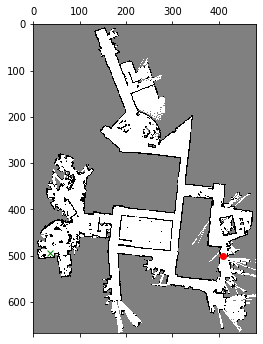

In [3]:
M = mpimg.imread('Map.png')

x_start = np.array([500, 410])
x_goal = np.array([495, 35])

ex.plot_path(np.array([]), x_start, x_goal, M)

At goal point
Number of nodes explored are:  62426
Length of the path:  457
Time:  4.936309701000027


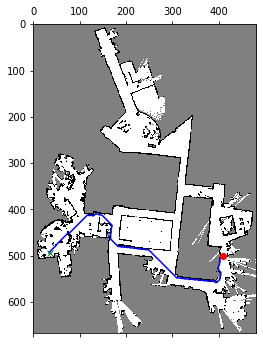

In [4]:
start = timeit.default_timer()
path = ex.plan_path_uninformed(x_start,x_goal,M)
stop = timeit.default_timer()
print('Time: ', stop - start)  
ex.plot_path(path, x_start, x_goal, M)

## 9.3 A* algorithm [3.0]

Implement A* algorithm by adding an heuristic to the `plan_path_uninformed` algorithm to inform and speed up the search.

Use the (straight-line) Euclidean distance to the goal as a heuristic function.

Implement `plan_path_astar` and verify that it is correct for some test input.

In [5]:
M_test = np.array([[1,1,0,1,1,1,1,1,1,1],
              [1,1,0,1,1,1,1,1,1,1],
              [1,1,0,1,1,1,1,1,1,1],
              [1,1,0,1,1,0,0,1,1,1],
              [1,1,1,1,1,0,0,1,1,1],
              [1,1,0,0,0,0,0,0,1,1],
              [1,1,1,1,0,0,1,1,1,1],
              [1,1,1,1,0,0,1,1,1,1],
              [1,1,1,1,0,0,1,1,1,1],
              [1,1,1,1,0,0,1,1,1,1]])
x_start = np.array([0,0])
x_goal = np.array([9,9])

path = ex.plan_path_astar(x_start,x_goal,M_test)

print_path = [[0 for i in range(10)]for j in range(10)]
print_path[0][0] = "*"
for i in range(path.shape[0]):
    print_path[path[i][0]][path[i][1]] = "*"
for j in range(len(print_path)):
    print(print_path[j])

At goal point
Number of nodes explored are:  46
Length of the path:  16
['*', 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, '*', 0, 0, 0, '*', 0, 0, 0, 0]
[0, '*', 0, 0, '*', 0, '*', 0, 0, 0]
[0, '*', 0, '*', 0, 0, 0, '*', 0, 0]
[0, 0, '*', 0, 0, 0, 0, '*', 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, '*', 0]
[0, 0, 0, 0, 0, 0, 0, '*', 0, 0]
[0, 0, 0, 0, 0, 0, 0, '*', 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, '*', 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, '*']


## 9.4 A* planning [2.0]

Use `plan_path_astar` to plan a path from start to goal in the previous scenario.

Plot the resulting path with the available function `plot_path`.

Print the lenght of the path and the number of nodes explored to find the goal.

At goal point
Number of nodes explored are:  16199
Length of the path:  459
Time:  1.722670133000065


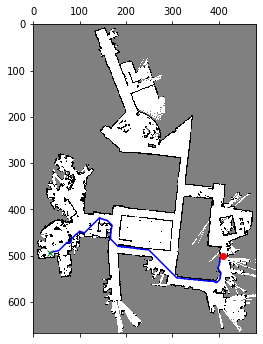

In [6]:
x_start = np.array([500, 410])
x_goal = np.array([495, 35])
start = timeit.default_timer()
path = ex.plan_path_astar(x_start,x_goal,M)
stop = timeit.default_timer()
print('Time: ', stop - start)  
ex.plot_path(path, x_start, x_goal, M)